In [9]:
import pandas as pd

# Load the training data
train_data = pd.read_csv(r'C:\Users\danie\OneDrive\Desktop\IronEagleX\Repos\IronEagleX-Internship\Titanic Project\Titanic App\train.csv')

# Display the first few rows of the dataset
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Impute missing values
imputer = SimpleImputer(strategy='median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])

# Fill missing 'Embarked' with the mode
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(mode_embarked, inplace=True)

# Drop 'Cabin' as an example of simplification (or transform it)
train_data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

# Drop unnecessary features
train_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Display the cleaned data
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on validation set
y_pred = logistic_model.predict(X_val)

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)
accuracy


0.8100558659217877

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predict on validation set
y_pred_dt = decision_tree_model.predict(X_val)

# Calculate and print the accuracy
accuracy_dt = accuracy_score(y_val, y_pred_dt)
accuracy_dt


0.7653631284916201

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = random_forest_model.predict(X_val)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_val, y_pred_rf)
accuracy_rf


0.8212290502793296

In [14]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on validation set
y_pred_svm = svm_model.predict(X_val)

# Calculate and print the accuracy
accuracy_svm = accuracy_score(y_val, y_pred_svm)
accuracy_svm


0.7821229050279329

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on validation set
y_pred_knn = knn_model.predict(X_val)

# Calculate and print the accuracy
accuracy_knn = accuracy_score(y_val, y_pred_knn)
accuracy_knn


0.7206703910614525

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Define categorical and numerical features
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']

# Create transformers for the pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a full pipeline with the preprocessor and a classifier
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
logistic_regression_pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred_pipeline = logistic_regression_pipeline.predict(X_val)

# Calculate and print the accuracy
accuracy_pipeline = accuracy_score(y_val, y_pred_pipeline)
accuracy_pipeline


0.8100558659217877

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Create a full pipeline with the preprocessor and a classifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
decision_tree_pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred_dt_pipeline = decision_tree_pipeline.predict(X_val)

# Calculate and print the accuracy
accuracy_dt_pipeline = accuracy_score(y_val, y_pred_dt_pipeline)
accuracy_dt_pipeline


0.776536312849162

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create a full pipeline with the preprocessor and a classifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline on the training data
random_forest_pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred_rf_pipeline = random_forest_pipeline.predict(X_val)

# Calculate and print the accuracy
accuracy_rf_pipeline = accuracy_score(y_val, y_pred_rf_pipeline)
accuracy_rf_pipeline


0.8212290502793296

In [19]:
from sklearn.svm import SVC

# Create a full pipeline with the preprocessor and a classifier
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42))
])

# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred_svm_pipeline = svm_pipeline.predict(X_val)

# Calculate and print the accuracy
accuracy_svm_pipeline = accuracy_score(y_val, y_pred_svm_pipeline)
accuracy_svm_pipeline


0.7821229050279329

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Create a full pipeline with the preprocessor and a classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit the pipeline on the training data
knn_pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred_knn_pipeline = knn_pipeline.predict(X_val)

# Calculate and print the accuracy
accuracy_knn_pipeline = accuracy_score(y_val, y_pred_knn_pipeline)
accuracy_knn_pipeline


0.8100558659217877

In [21]:
from sklearn.model_selection import cross_val_score

# Define the models to evaluate
models = {
    'Logistic Regression': logistic_regression_pipeline,
    'Random Forest': random_forest_pipeline,
    'KNN': knn_pipeline
}

# Perform cross-validation and store results
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    results[name] = (scores.mean(), scores.std())

results


{'Logistic Regression': (0.7906628582684921, 0.028383802018759997),
 'Random Forest': (0.796395154141633, 0.02513230546674777),
 'KNN': (0.8005220131980696, 0.02411756089695164)}

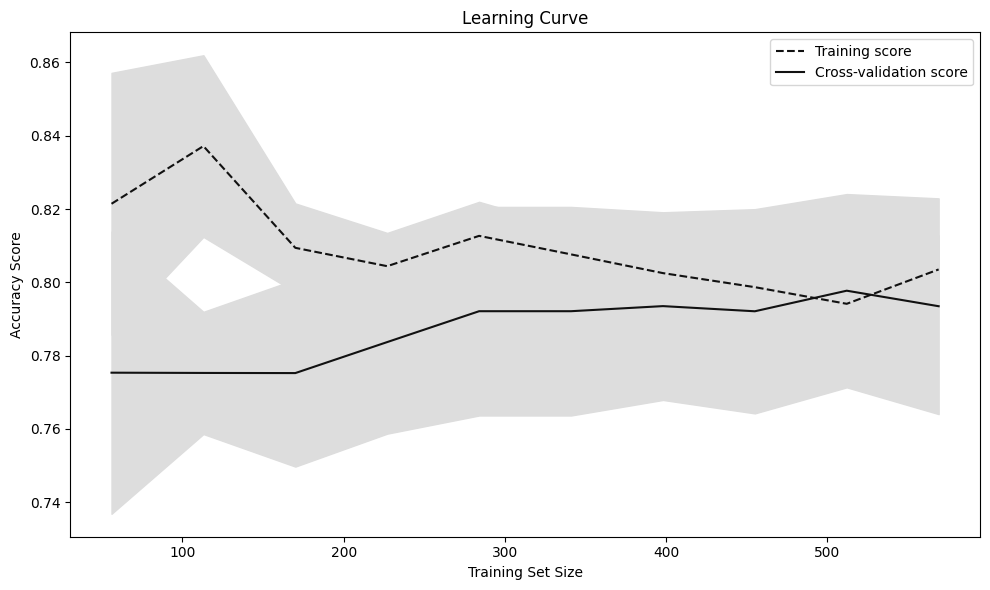

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Choose the model for which to plot the learning curve
model = logistic_regression_pipeline  # Example for Logistic Regression

# Set up the learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Logistic Regression hyperparameter
    'classifier__max_iter': [100, 200, 300]
}

# Create GridSearch object
grid_search = GridSearchCV(logistic_regression_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
grid_search.best_params_, grid_search.best_score_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'classifier__C': 0.1, 'classifier__max_iter': 100}, 0.7934896089825667)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the distribution of parameters
param_distributions = {
    'classifier__C': uniform(0.1, 10),  # Logistic Regression hyperparameter
    'classifier__max_iter': [100, 200, 300, 400, 500]
}

# Create RandomizedSearch object
random_search = RandomizedSearchCV(logistic_regression_pipeline, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Best parameters and best score
random_search.best_params_, random_search.best_score_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'classifier__C': 0.30584494295802445, 'classifier__max_iter': 200},
 0.7948882103811682)

In [26]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the search space
search_spaces = {
    'classifier__C': Real(0.1, 10, prior='uniform'),
    'classifier__max_iter': Integer(100, 500)
}

# Create BayesSearchCV object
bayes_search = BayesSearchCV(logistic_regression_pipeline, search_spaces, n_iter=10, cv=5, scoring='accuracy', random_state=42, verbose=1)
bayes_search.fit(X_train, y_train)

# Best parameters and best score
bayes_search.best_params_, bayes_search.best_score_


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


(OrderedDict([('classifier__C', 0.13594004182195796),
              ('classifier__max_iter', 427)]),
 0.7934896089825667)